In [34]:
#Importación de librerías
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [35]:
# Cargar datos de entrenamiento, prueba y sample 
df = pd.read_csv('C:/Users/edamv/ML_Proyectos/retail_sales_dataset.csv') 

# Mostrar información básica 
print(f"comienzo: {"-"*400}") 

print(f" {df.head(5)}") 

print(f"cola: {"-"*400}") 


print(f" {df.tail(5)}") 


comienzo: ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2    

In [36]:
#Vista del dataset
print(df.shape)

df.sample(5)

(1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
181,182,2023-06-15,CUST182,Male,62,Beauty,4,30,120
351,352,2023-06-11,CUST352,Male,57,Electronics,2,500,1000
517,518,2023-05-11,CUST518,Female,40,Clothing,1,30,30
102,103,2023-01-17,CUST103,Female,59,Clothing,1,25,25
314,315,2023-06-01,CUST315,Male,47,Clothing,2,30,60


In [37]:
# Verificar filas duplicadas 
duplicados = df.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 0
No hay filas duplicadas.


In [38]:
# Verificar datos nulos 
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


In [39]:
#Verificar columnas y contenido

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de nulos: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df)
#valores formatos anómalos: Date object a datetime, Gender object a categórica,  

Columna: Transaction ID
Ejemplos de valores: [ 1  2  3  4  5  6  7  8  9 10]
Cantidad de valores únicos: 1000
Formato de columna: int64
Cantidad de nulos: 0
----------------------------------------
Columna: Date
Ejemplos de valores: ['2023-11-24' '2023-02-27' '2023-01-13' '2023-05-21' '2023-05-06'
 '2023-04-25' '2023-03-13' '2023-02-22' '2023-12-13' '2023-10-07']
Cantidad de valores únicos: 345
Formato de columna: object
Cantidad de nulos: 0
----------------------------------------
Columna: Customer ID
Ejemplos de valores: ['CUST001' 'CUST002' 'CUST003' 'CUST004' 'CUST005' 'CUST006' 'CUST007'
 'CUST008' 'CUST009' 'CUST010']
Cantidad de valores únicos: 1000
Formato de columna: object
Cantidad de nulos: 0
----------------------------------------
Columna: Gender
Ejemplos de valores: ['Male' 'Female']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de nulos: 0
----------------------------------------
Columna: Age
Ejemplos de valores: [34 26 50 37 30 45 46 63 52 23]
Cantid

In [40]:
# Convertir la columna 'fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [41]:
#df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')

In [42]:
# Estadísticas descriptivas
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


<Axes: >

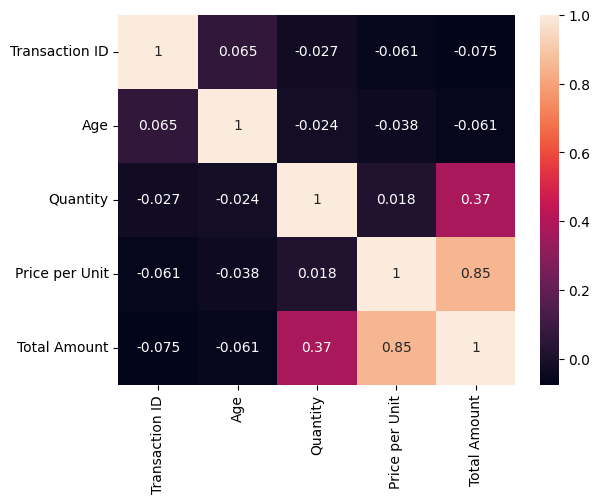

In [43]:
#Correlación
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
#df.corr()

In [44]:
# Agrupar por la media de Total Amount

media_sales = numeric_df.groupby("Total Amount").mean()
media_sales
#print(max(numeric_df['Total Amount']))

,Transaction ID,Age,Quantity,Price per Unit
Total Amount,,,,
25,509.196078,43.470588,1.000000,25.000000
30,525.686275,40.313725,1.000000,30.000000
50,521.869565,41.356522,1.530435,36.739130
60,508.688889,41.755556,2.000000,30.000000
75,555.418605,38.767442,3.000000,25.000000
90,520.659091,39.681818,3.000000,30.000000
100,493.212963,43.064815,3.018519,37.268519
120,490.232558,46.232558,4.000000,30.000000
150,538.595238,42.857143,3.000000,50.000000


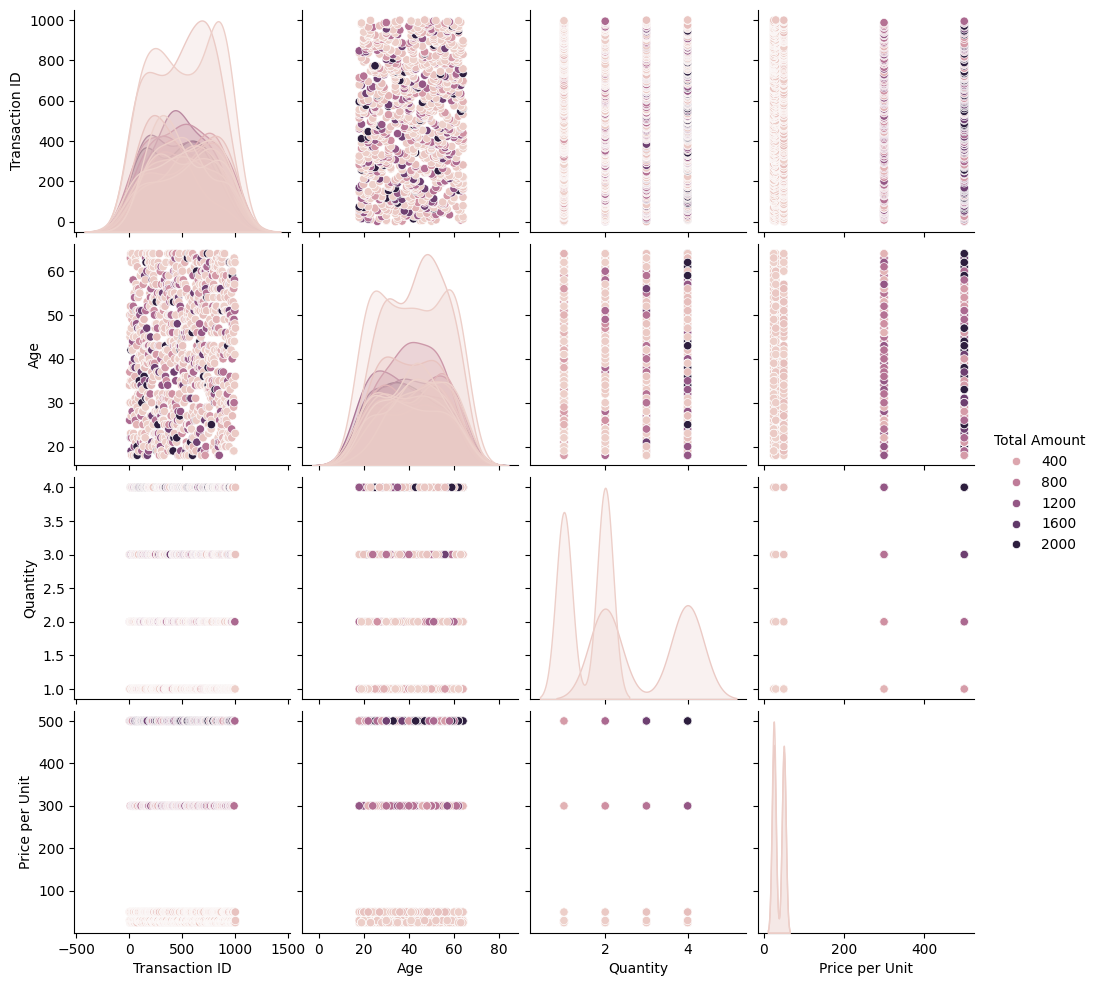

In [45]:
#Gráficos de dispersión con relación al Total Amount
sns.pairplot(df, hue='Total Amount') 
plt.show()

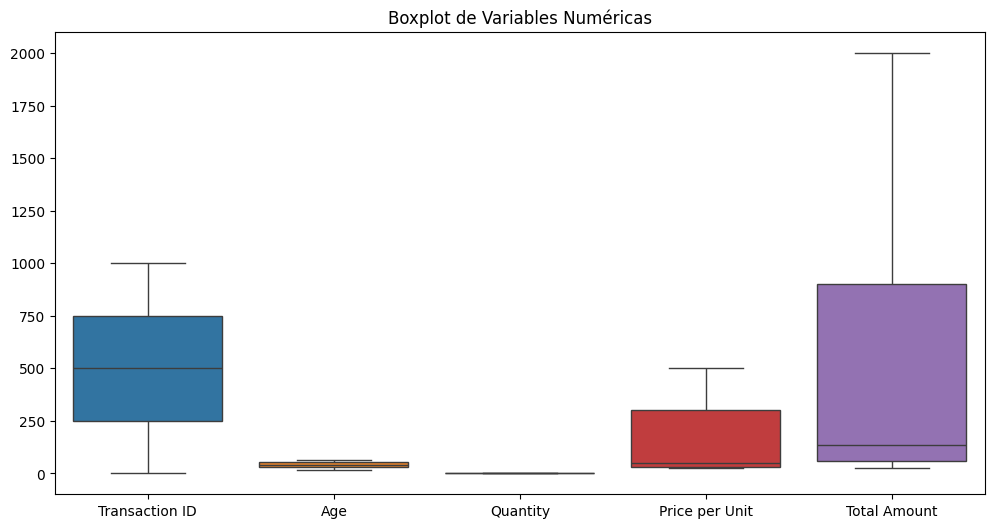

In [46]:
# Identificación y manejo de outliers con boxplots para confirmar las observaciones de los gráficos anteriores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot de Variables Numéricas')
plt.show()


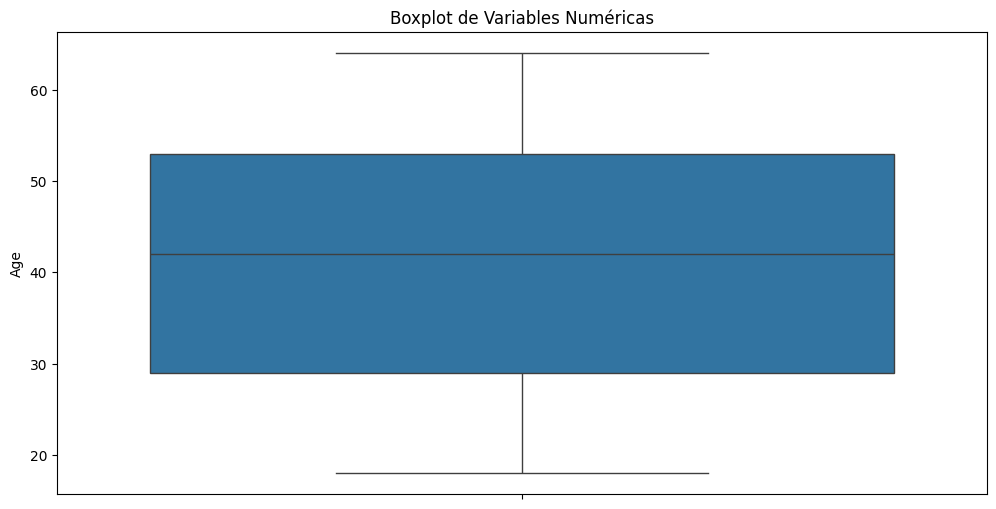

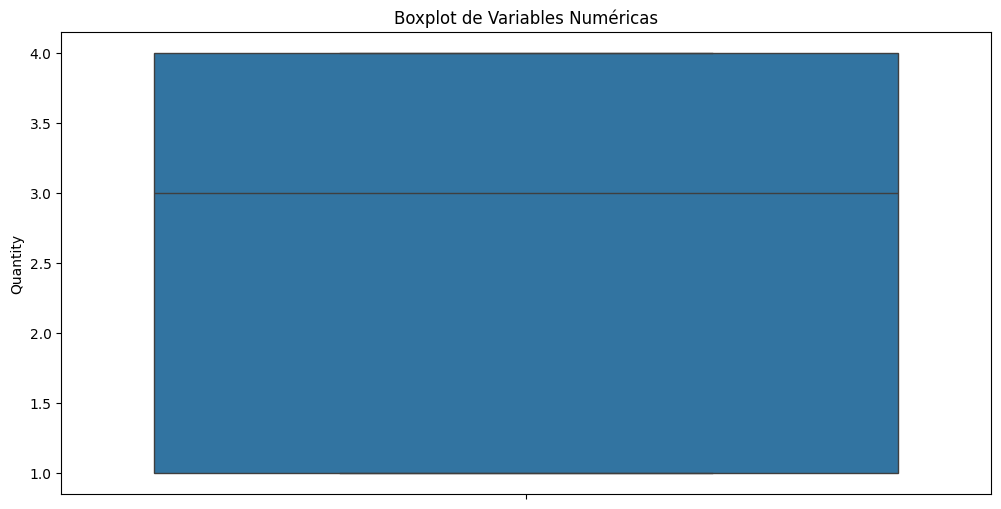

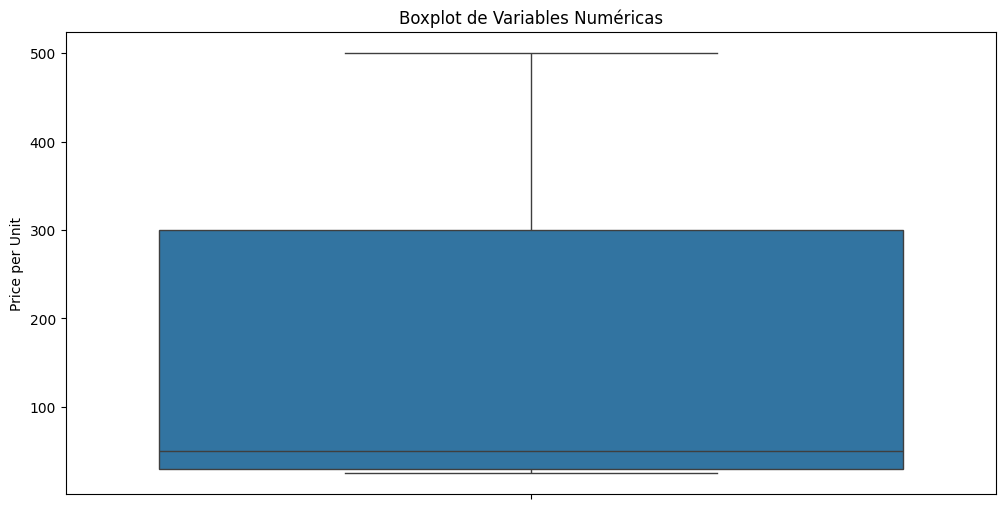

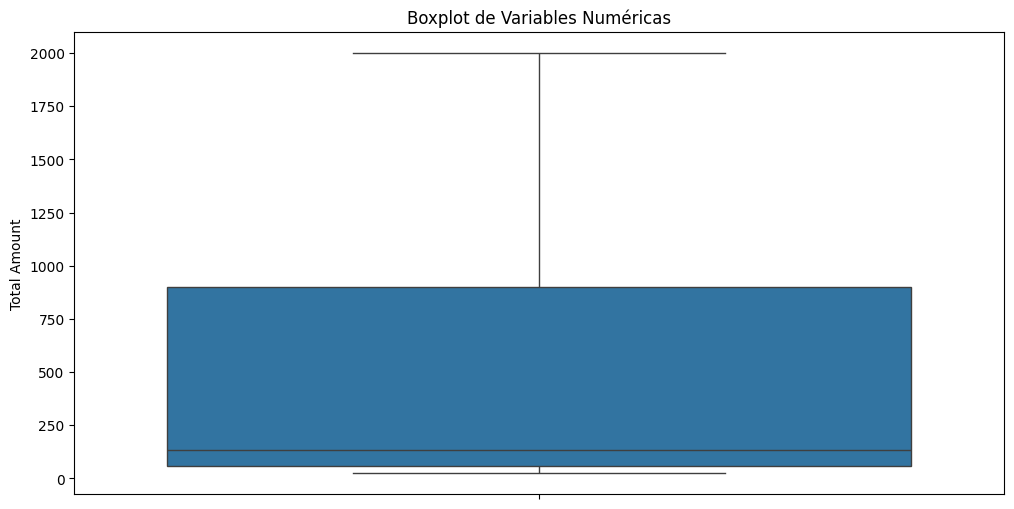

In [47]:
# Identificación y manejo de outliers con boxplots para confirmar las observaciones de los gráficos anteriores

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df['Age'])
plt.title('Boxplot de Variables Numéricas')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df['Quantity'])
plt.title('Boxplot de Variables Numéricas')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df['Price per Unit'])
plt.title('Boxplot de Variables Numéricas')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df['Total Amount'])
plt.title('Boxplot de Variables Numéricas')
plt.show()


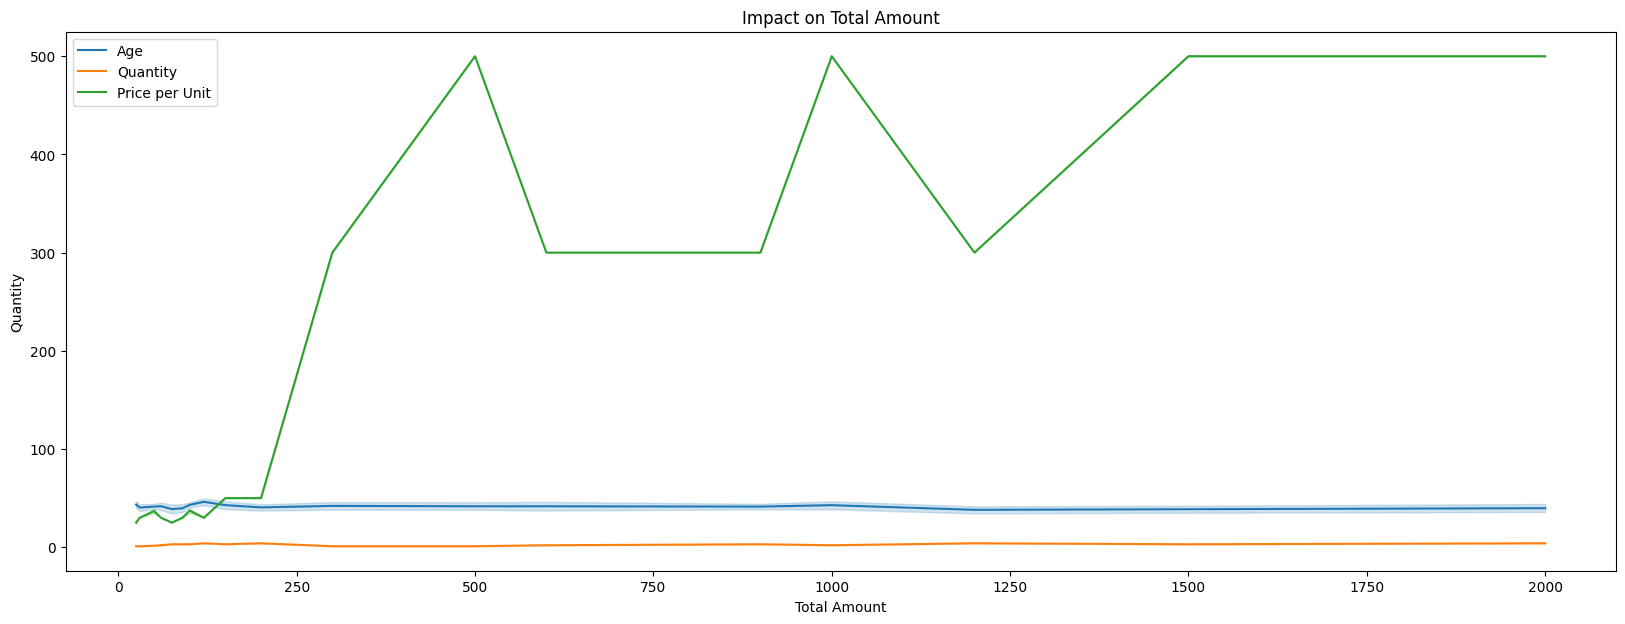

In [48]:
# Efectos sobre la calidad de los otros elementos
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="Total Amount",y="Age",label="Age")
sns.lineplot(data=df, x="Total Amount",y="Quantity",label="Quantity")
sns.lineplot(data=df, x="Total Amount",y="Price per Unit",label="Price per Unit")
plt.ylabel("Quantity")
plt.title("Impact on Total Amount")
plt.legend()
plt.show()

In [53]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [54]:
numeric_df

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100
...,...,...,...,...,...
995,996,62,1,50,50
996,997,52,3,30,90
997,998,23,4,25,100
998,999,36,3,50,150


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [55]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [67]:
# Convertir columnas de tipo 'Timestamp' a formato numérico (segundos desde una fecha de referencia) 
for col in df.select_dtypes(include=['datetime64', 'datetime']): 
    df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan) 

In [71]:
# Manejar valores no numéricos en columnas numéricas 
for col in df.select_dtypes(include=['object']).columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')

In [73]:
#Defined X value and y value , and split the data train

X = df.drop(columns="Total Amount")           
y = df["Total Amount"]    # y = quality

In [74]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (750, 8)
X Test  :  (250, 8)
Y Train :  (750,)
Y Test  :  (250,)


X Train :  (750, 8)
X Test  :  (250, 8)
Y Train :  (750,)
Y Test  :  (250,)
Linear Regression:
Accuracy: 0.88
Precision: 1.0
Recall: 0.781021897810219
F1-Score: 0.8770491803278688
ROC-AUC: 0.9821716943349913




c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


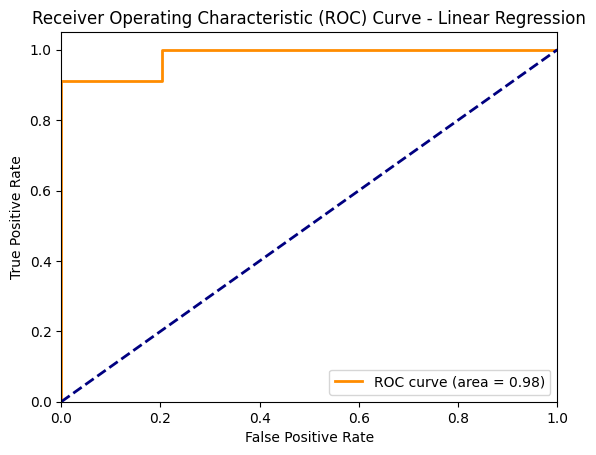

KNN:
Accuracy: 0.856
Precision: 0.8976377952755905
Recall: 0.8321167883211679
F1-Score: 0.8636363636363636
ROC-AUC: 0.9387636457593179




c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


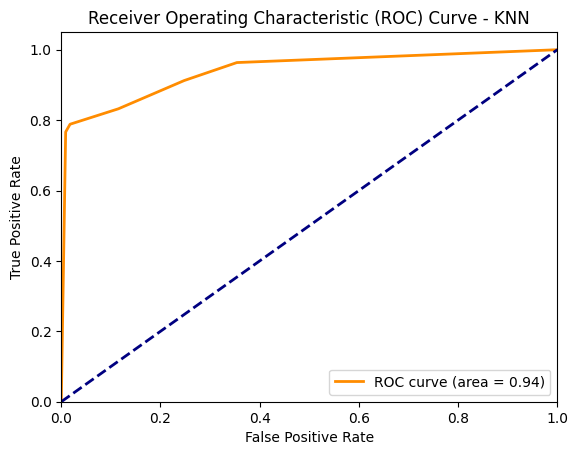

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0




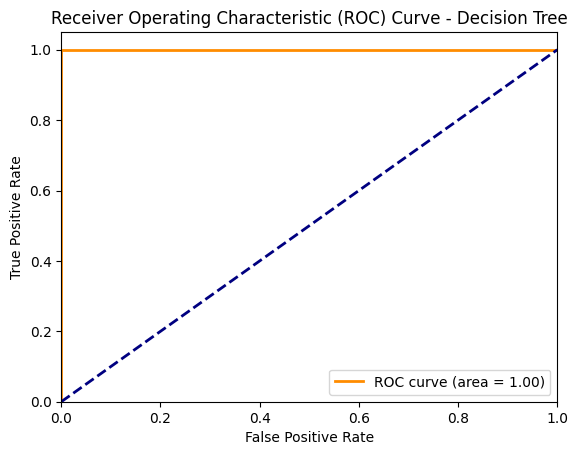

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0




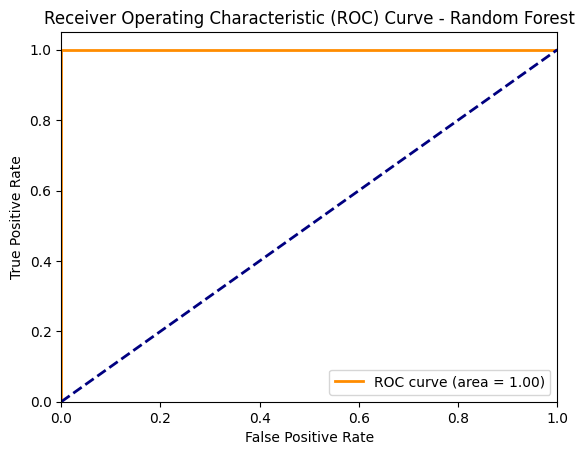

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


XGBoost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0




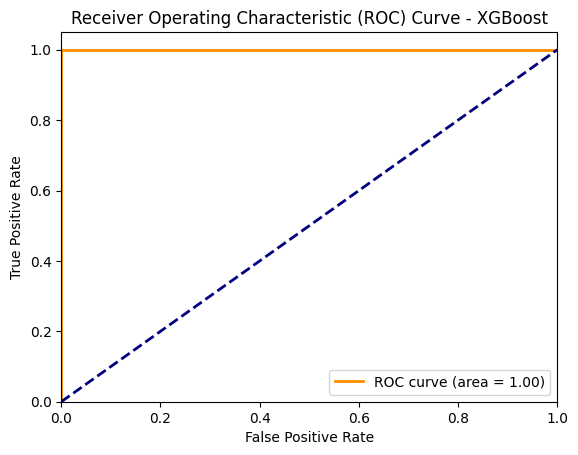

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 5
[LightGBM] [Info] Start training from score 0.484000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Customer ID' 'Gender' 'Product Category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


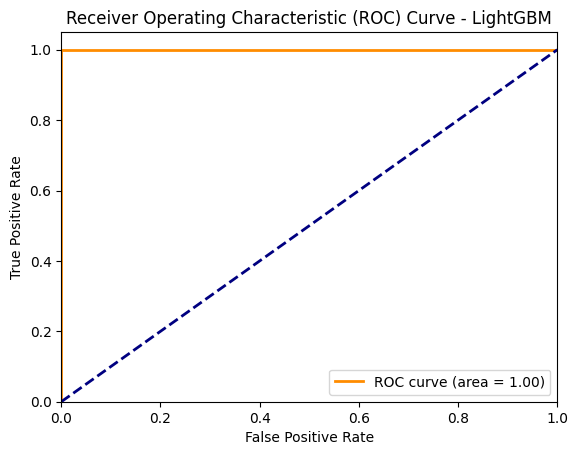

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo: Linear Regression
Accuracy: 0.88
Precision: 1.0
Recall: 0.781021897810219
F1-Score: 0.8770491803278688
ROC-AUC: 0.9821716943349913


Modelo: KNN
Accuracy: 0.856
Precision: 0.8976377952755905
Recall: 0.8321167883211679
F1-Score: 0.8636363636363636
ROC-AUC: 0.9387636457593179


Modelo: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


Modelo: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


Modelo: XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


Modelo: LightGBM
Accuracy: 1.0
Precision: 1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Suponiendo que df_final ya está cargado y preprocesado en el entorno
#df = df_final.copy()

# Convertir columnas de tipo 'Timestamp' a formato numérico (segundos desde una fecha de referencia)
for col in df.select_dtypes(include=['datetime64', 'datetime']):
    df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# Manejar valores no numéricos en columnas numéricas
for col in df.select_dtypes(include=(['object'])).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la variable objetivo en categorías binarios
threshold = df["Total Amount"].median()
df["Total Amount Class"] = (df["Total Amount"] >= threshold).astype(int)

# Dividir los datos en características (X) y etiqueta (y)
X = df.drop(columns=["Total Amount", "Total Amount Class"])
y = df["Total Amount Class"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# Preprocesamiento de características numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=(['object'])).columns

# Crear pipeline de preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough'
)

# Crear pipeline completo y ajustar para cada modelo
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Ajustar el modelo
    pipeline.fit(X_train, y_train)
    
    # Predicción y evaluación
    y_pred_prob = pipeline.predict(X_test)
    y_pred_class = (y_pred_prob >= 0.5).astype(int)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Guardar resultados
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Imprimir resultados
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("\n")
    
    # Crear y visualizar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# Mostrar resultados
for model_name, metrics in results.items():
    print(f"Modelo: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")

# Seleccionar el mejor modelo basado en ROC-AUC
best_model = max(results, key=lambda x: results[x]['ROC-AUC'])
print(f"El mejor modelo es: {best_model} basado en ROC-AUC")
